In [15]:
#Importing the packages required
import datetime
import sqlite3 
import re
from dateutil.relativedelta import relativedelta
import pandas as pd
import matplotlib as mpl
import sys
%matplotlib inline

#Inputs of the rasa_nlu models
entities=['Gov Tax','50_months']
intent=['how_much']
customer='C2'
def rearrange(list):
    if list[0] in ['coffee','Gov Tax','Taxi','Food','Clothings']:
        return list
    if list[1] in ['coffee','Gov Tax','Taxi','Food','Clothings']:
        temp=list[0]
        list[0]=list[1]
        list[1]=temp
        return list
entities=rearrange(entities)


#Program for asking Intent
if intent==[]:
    intent.append('a')
if intent[0] not in ['how_much','how_many']:
    inp = ""
    while inp != "how_much spent" and inp != "how_many times spent":
        print('Hi',customer,'Hi,I didnot get what you are exactly looking for. ')
        inp = input("Please,Enter what you require from: how_much spent or how_many times spent: ")
        if inp != "how_much spent" and inp != "how_many times spent":
            print("You must type how_much spent or how_many times spent")
    intent[0]=inp.split(' ')[0]
if len(entities)!=2:
    inp1 = ""
    while inp1 != "how_much spent" and inp != "how_many times spent":
        print('Hi',customer,'Hi,I didnot get what you are exactly looking for. ')
        inp = input("Please,Enter what you require from: how_much spent or how_many times spent: ")
        if inp1 != "how_much spent" and inp != "how_many times spent":
            print("You must type how_much spent or how_many times spent")
#Function that transforms the list of entities into an sql query
def query(list):
    to = datetime.date.today()
    if list[1].split('_')[1]=='days':
        fro=to+relativedelta(days=-int(list[1].split('_')[0]))
    if list[1].split('_')[1]=='months':
        fro=to+relativedelta(months=-int(list[1].split('_')[0]))
    if list[1].split('_')[1]=='years':
        fro=to+relativedelta(years=-int(list[1].split('_')[0]))
    to=to.strftime("%Y-%m-%d 00:00:00")
    fro=fro.strftime("%Y-%m-%d 00:00:00")
    item='a'
    for i in list:
        if i in ['coffee','Gov Tax','Taxi','Food','Clothings']:
            item=i
    if intent[0]=='how_much':
        j='sum(amount)'
    if intent[0]=='how_many':
        j='COUNT(amount)'  
    return 'SELECT ',j,' FROM Statement WHERE customer_Id = ',customer,' AND category = ',item, ' AND date < ',to,' AND date >= ',fro

#Using the function query,that transforms the list of entities into an sql query
x=[]
for i in query(entities):
    x.append(i)
s= ''
x=s.join(x)
x
c=query(entities)

#Rearranging the SQL query in the required form

s= ''
d=[s.join(c[0:3]),c[3],c[4],c[5],c[6],c[7],c[8],c[9],""]
x=[]
for i in d:
    x.append(i)
s= "'"
x=s.join(x)

#Print the SQL query that is used to query the Database corresponding to the given inputs from the Rasa_nlu model
print(x)

SELECT sum(amount) FROM Statement WHERE customer_Id = 'C2' AND category = 'Gov Tax' AND date < '2020-07-09 00:00:00' AND date >= '2016-05-09 00:00:00'


In [16]:
# connect withe the myTable database 
connection = sqlite3.connect("statement.db")

#Function that takes the connection and outputs the table containg the result of the query
def sum(conn):
    """
    Query sum of amount in the statement table corresponding to the other entity constraints
    :param conn: the Connection object
    :return:
    """
    cur = conn.cursor()
    cur.execute(x)
    #cur.execute("SELECT sum(amount) FROM Sheet1 WHERE customer_Id='C1' AND category='Clothings' AND date <'2020-02-20 00:00:00' AND date>= '2019-12-20 00:00:00'")
    results=cur.fetchall()
    return results

#Function that takes the connection as input and outputs the result of the query
def result(conn):
    for i in sum(conn):
        return i[0]
r=result(connection)               #Store the result in r
print(r)

276


In [17]:
if r==None:
    print("Oops...! Couldn't find any transactions matching this criteria")
else:
    #Output the result as a statement(in the format that is more of an interactive in nature)
    if intent[0]=='how_much':
        print('Hi',customer,",",'The amount you spent in the last',entities[1].split('_')[0],entities[1].split('_')[1],'on',entities[0],'is',r,'dollars')
    if intent[0]=='how_many':
        print('Hi',customer,",",'The no. of times you spent in the last',entities[1].split('_')[0],entities[1].split('_')[1],'on',entities[0],'is',r)

Hi C2 , The amount you spent in the last 50 months on Gov Tax is 276 dollars


SELECT * FROM Statement WHERE customer_id = 'C2' AND category = 'Gov Tax' AND date < '2020-07-09 00:00:00' AND date >= '2016-05-09 00:00:00'
Hi Mr C2 ,
The amount you spent in the last 50 months on Gov Tax is 276 dollars
        amount
date          
Aug-19      64
Oct-19      87
Nov-19      56
Dec-19      69


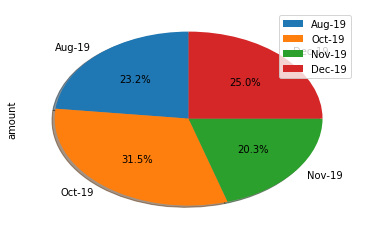

In [18]:
def query1(list):
    to = datetime.date.today()
    if list[1].split('_')[1]=='days':
        fro=to+relativedelta(days=-int(list[1].split('_')[0]))
    if list[1].split('_')[1]=='months':
        fro=to+relativedelta(months=-int(list[1].split('_')[0]))
    if list[1].split('_')[1]=='years':
        fro=to+relativedelta(years=-int(list[1].split('_')[0]))
    to=to.strftime("%Y-%m-%d 00:00:00")
    fro=fro.strftime("%Y-%m-%d 00:00:00")
    item='a'
    for i in list:
        if i in ['coffee','Gov Tax','Taxi','Food','Clothings']:
            item=i
    return 'SELECT * FROM Statement WHERE customer_id = ',customer,' AND category = ',item, ' AND date < ',to,' AND date >= ',fro
c=query1(entities)
s= ''
d=[s.join(c[0]),c[1],c[2],c[3],c[4],c[5],c[6],c[7],""]
x=[]
for i in d:
    x.append(i)
s= "'"
x=s.join(x)
print(x)
c=query1(entities)
def sum(conn):
    cur = conn.cursor()
    cur.execute(x)
    #cur.execute("SELECT * FROM statement WHERE customer_id='C1' AND category='Taxi' AND date <'2020-02-20 00:00:00' AND date>= '2019-10-20 00:00:00'")
    results=cur.fetchall()
    #print(results[0][0])
    return results
#print(sum(connection))
import pandas as pd
df = pd.DataFrame.from_records(sum(connection))#,index=1)
if df.size==0:
    print("Oops...! Couldn't find any transactions matching this criteria")
if df.size!=0:
    df.columns=['cust','date','amount','category']
    df.date = pd.to_datetime(df.date)
    dg = df.groupby(pd.Grouper(key='date', freq='1M')).sum() # groupby each 1 month
    dg.index = dg.index.strftime('%b-%y')
#Printing the output corresponding to the 
    if intent[0]=='how_much':
        print('Hi Mr',customer,",")
        print('The amount you spent in the last',entities[1].split('_')[0],entities[1].split('_')[1],'on',entities[0],'is',r,'dollars')
        dg=dg[(dg.T != 0).any()]
        print(dg)
        #dg.plot.line()
        #dg.plot.bar()
        dg.plot.pie(subplots=True,autopct='%1.1f%%',shadow=True, startangle=90)
    if intent[0]=='how_many':
        df=df[["date","amount"]]
        df.columns=['date','count']
        df.date = pd.to_datetime(df.date)
        dg = df.groupby(pd.Grouper(key='date', freq='1M')).count() # groupby each 1 month
        dg.index = dg.index.strftime('%b-%y')
        print('Hi Mr',customer)
        print('The no. of times you spent in the last',entities[1].split('_')[0],entities[1].split('_')[1],'on',entities[0],'is',r)
        print()
        #dg.index.name="Month"
        dg.columns=['count']
        dg=dg[(dg.T != 0).any()]
        print(dg)
        #dg.plot.line()
        dg.plot.bar()
        #dg.plot.pie(subplots=True)

In [5]:
#Program for asking Intent
inp = ""
while inp != "how_much spent" and inp != "how_many times spent":
    print('Hi',customer,'Hi,I didnot get what you are exactly looking for. ')
    inp = input("Please,Enter what you require from: how_much spent or how_many times spent: ")
    if inp != "how_much spent" and inp != "how_many times spent":
        print("You must type how_much spent or how_many times spent")
intent[0]=inp.split(' ')[0]
print(intent[0])

Hi C1 Hi,I didnot get what you are exactly looking for. 
Please,Enter what you require from: how_much spent or how_many times spent: how_much spent
how_much


In [22]:
entities=['8_months']#'Gov Tax','8_months']

In [23]:
#Program for asking entity1
inp1 = ""
while len(entities)!=2 and len([value for value in entities if value in ['coffee','Gov Tax','Taxi','Food','Clothings']])!=1:
    print('Hi',customer,'Hi,I didnot get what you are exactly looking for. ')
    inp1 = input("Please,Enter the category which you want to analyse: coffee ,Gov Tax ,Taxi ,Food ,Clothings: ")
    if inp1 in ['coffee','Gov Tax','Taxi','Food','Clothings']:
        entities.append(inp1)

Hi C1 Hi,I didnot get what you are exactly looking for. 
Please,Enter the category which you want to analyse: coffee ,Gov Tax ,Taxi ,Food ,Clothings: Taxi


In [24]:
entities

['8_months', 'Taxi']

In [25]:
#Rearranging the entities so thta entity one is the category
#entities=['80_days','Gov Tax']
def rearrange(list):
    if list[0] in ['coffee','Gov Tax','Taxi','Food','Clothings']:
        return list
    if list[1] in ['coffee','Gov Tax','Taxi','Food','Clothings']:
        temp=list[0]
        list[0]=list[1]
        list[1]=temp
        return list
rearrange(entities)

['Taxi', '8_months']

In [26]:
for i in entities:
    if i.endswith("days")==True or i.endswith("months")==True or i.endswith("years")==True:
        print(i)

8_months


In [6]:
x="How much did i spent on clothing in the last one month?"
from gensim.parsing.preprocessing import remove_stopwords
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
for y in x.lower(): 
    if y in punctuations: 
        x = x.replace(y, "")
print(x.split())
x=remove_stopwords(x)
x=x.split()
x

['How', 'much', 'did', 'i', 'spent', 'on', 'clothing', 'in', 'the', 'last', 'one', 'month']


['How', 'spent', 'clothing', 'month']

In [7]:
y=[]
for word in x:
    word=word.lower()
    y.append(word)
y

['how', 'spent', 'clothing', 'month']

In [8]:
import spacy
sp = spacy.load('en_core_web_sm')

all_stopwords = sp.Defaults.stop_words

x="How much did i spent on clothing in the last one month?"
from gensim.parsing.preprocessing import remove_stopwords
punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
for y in x.lower(): 
    if y in punctuations: 
        x = x.replace(y, "")
print(x.split())
x= [word for word in x.split() if not word in all_stopwords]

print(x)

['How', 'much', 'did', 'i', 'spent', 'on', 'clothing', 'in', 'the', 'last', 'one', 'month']
['How', 'spent', 'clothing', 'month']


In [27]:
for i in range(10):
    if i>=4:
        print(i)

4
5
6
7
8
9


In [28]:
import sqlite3
import pandas as pd
filename="statement"
con=sqlite3.connect(filename+".db")
wb=pd.ExcelFile(filename+'.xlsx')
for sheet in wb.sheet_names:
        df=pd.read_excel(filename+'.xlsx',sheet_name=0)
        df.to_sql(sheet,con, index=False,if_exists="replace")
con.commit()
con.close()